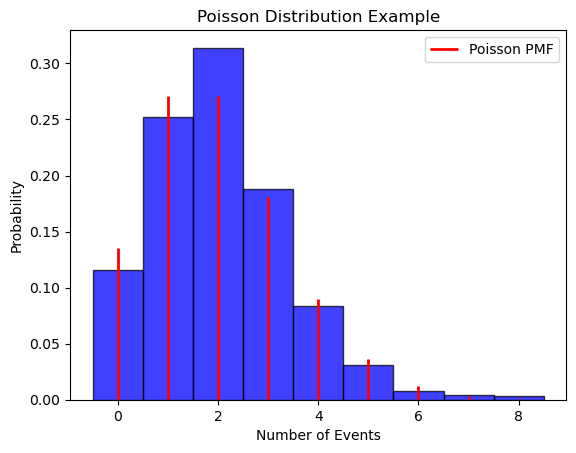

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Set the average rate of event occurrences (lambda)
lambda_value = 2.0

# Generate random samples from a Poisson distribution
data = np.random.poisson(lambda_value, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, max(data) + 1.5) - 0.5, density=True, alpha=0.75, color='blue', edgecolor='black')

# Plot the Poisson probability mass function for comparison
poisson_pmf = np.exp(-lambda_value) * np.power(lambda_value, np.arange(0, max(data) + 1)) / factorial(np.arange(0, max(data) + 1))
plt.vlines(np.arange(0, max(data) + 1), 0, poisson_pmf, colors='red', lw=2, label='Poisson PMF')

# Add labels and legend
plt.title('Poisson Distribution Example')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()

# Show the plot
plt.show()

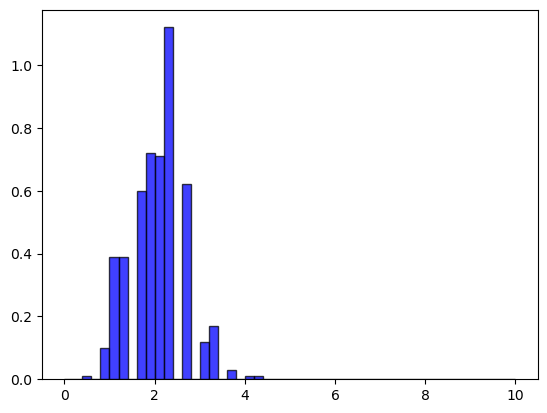

In [138]:
n_samples = 500
sample_size = 5

data = np.random.poisson(lambda_value, size=(n_samples, sample_size))
mean_sample = np.mean(data, axis=1)

plt.hist(mean_sample, bins=np.linspace(0, 10, 51), density=True, alpha=0.75, color='blue', edgecolor='black')
plt.show()